## Exemplo de um sinal com dois senos

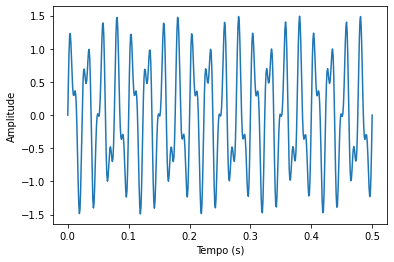

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
t = np.linspace(0, 0.5, 500) # 500 números, de 0 a 0.5 -> 1 kHz de amostragem
s = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)
plt.ylabel("Amplitude")
plt.xlabel("Tempo (s)")
plt.plot(t, s)


## Resultado da transforma rápida com dois senos

<BarContainer object of 250 artists>

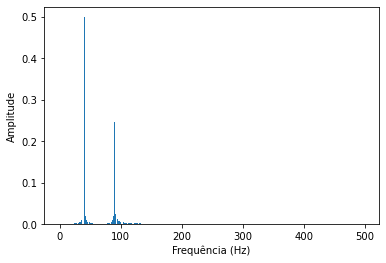

In [ ]:
fft = np.fft.fft(s)

T = t[1] - t[0] # 0.001 -> 1/T = 1000
N = s.size
#f = np.linspace(0, 1 / T, N)
# fornece os componentes de frequência correspondentes aos dados
f = np.fft.fftfreq(len(s), T)

frequencias = f[:N // 2]
amplitudes = np.abs(fft)[:N // 2] * 1 / N

plt.ylabel("Amplitude")
plt.xlabel("Frequência (Hz)")
plt.bar(frequencias, amplitudes, width=1.5)


## Espectograma de Frequencias

Text(0.5, 0, 'Tempo (s)')

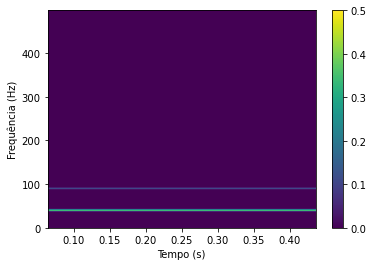

In [ ]:
plt.specgram(s, NFFT=N-1, Fs=1/T, scale='linear', scale_by_freq=False)
plt.colorbar()
plt.ylabel('Frequência (Hz)')
plt.xlabel('Tempo (s)')



## Exemplo com a  função seno de sinal

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
# número de pontos
N = 1024
#numero de elementos em x
Fs=150
T = 1.0 / Fs
x = np.linspace(0.0, N*T, N)
#senoide de frequencia 5Hz e amplitude 1.
signal.square
y = np.sin(5*2.0*np.pi*x)
#resultado usando FFT
yf = fft(y)
#tranformando x em frequencia, para metade dos pontos N//2
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)


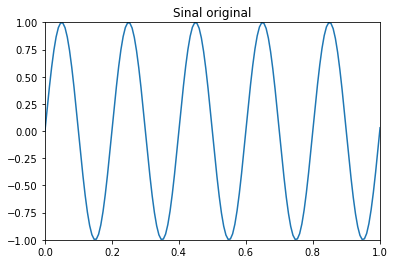

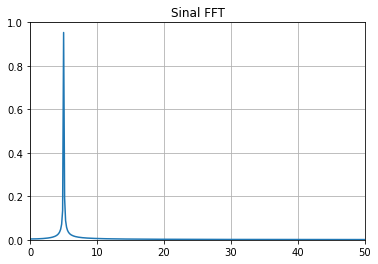

In [ ]:
plt.figure(1)
plt.title("Sinal original")
plt.plot(x,y)
plt.axis([0, 1, -1, 1])
plt.show()
plt.figure(2)
plt.title("Sinal FFT")
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.axis([0, 50, 0, 1])
plt.grid()
plt.show()


## Exemplo com uma função quadrada

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
# número de pontos
N = 1024
#numero de elementos em x
Fs=150
T = 1.0 / Fs
x = np.linspace(0.0, N*T, N)
#onda quadrada de frequencia 5Hz e amplitude 1.
y = signal.square(5*2.0*np.pi*x)
#resultado usando FFT
yf = fft(y)
#tranformando x em frequencia, para metade dos pontos N//2
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)


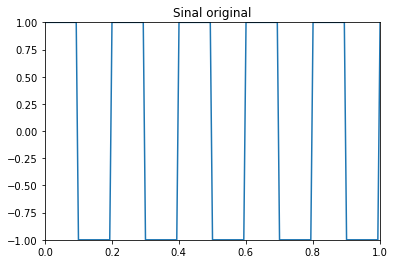

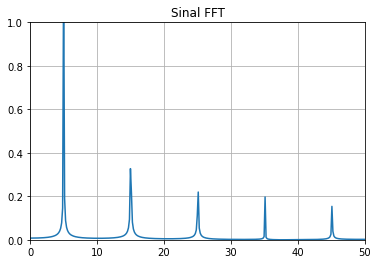

In [ ]:
plt.figure(1)
plt.title("Sinal original")
plt.plot(x,y)
plt.axis([0, 1, -1, 1])
plt.show()
plt.figure(2)
plt.title("Sinal FFT")
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.axis([0, 50, 0, 1])
plt.grid()
plt.show()


## Exemplo de um sinal com três senos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

<ipython-input-2-6e8d2447d05b>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


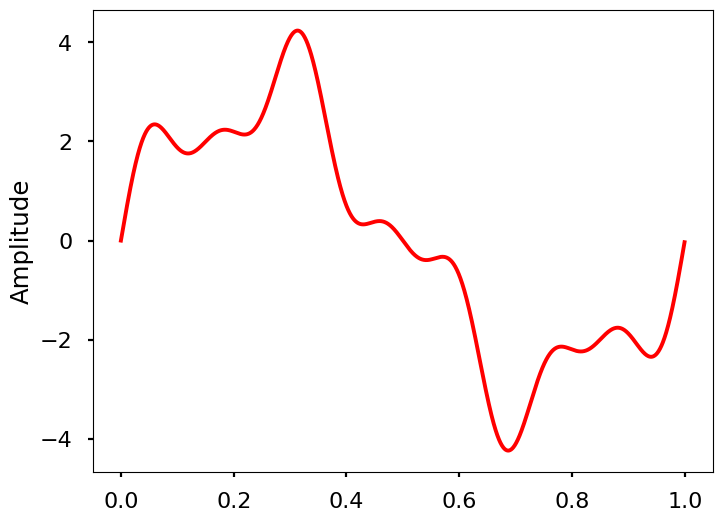

In [ ]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [ ]:
import pandas as pd

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


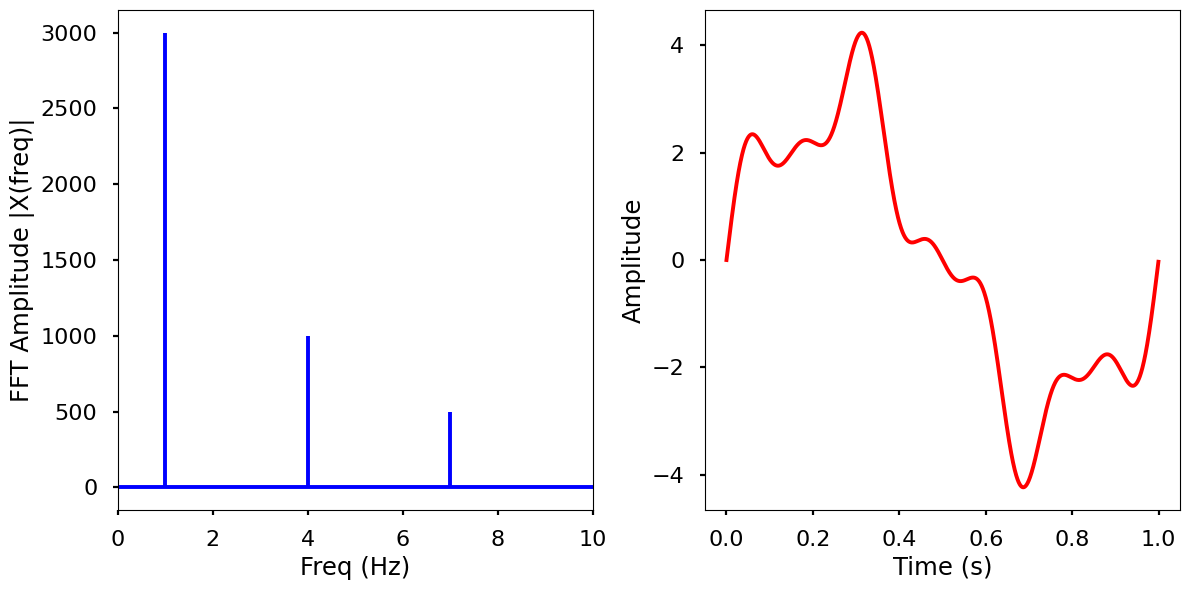

In [ ]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('930-data-export.csv', 
                 delimiter=',', parse_dates=[1])
df.rename(columns={'Timestamp (Hour Ending)':'hour',
                   'Demand (MWh)':'demand'},
          inplace=True)

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


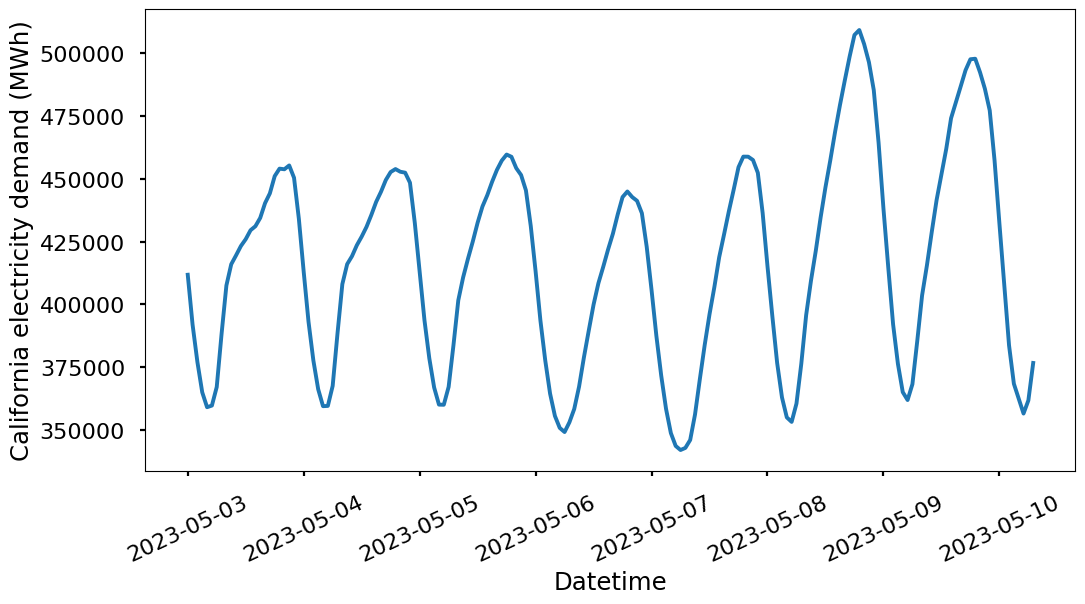

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(df['hour'], df['demand'])
plt.xlabel('Datetime')
plt.ylabel('California electricity demand (MWh)')
plt.xticks(rotation=25) 
plt.show()

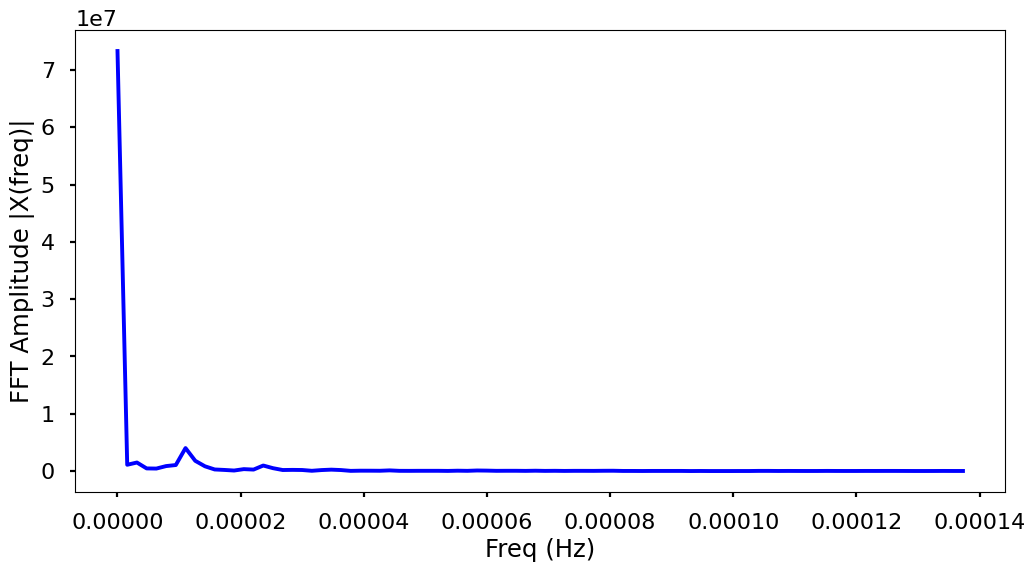

In [ ]:
X = fft(df['demand'])
N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1 / (60*60)
T = N/sr
freq = n/T 

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

<ipython-input-15-63503f5ba567>:2: RuntimeWarning: divide by zero encountered in true_divide
  t_h = 1/f_oneside / (60 * 60)


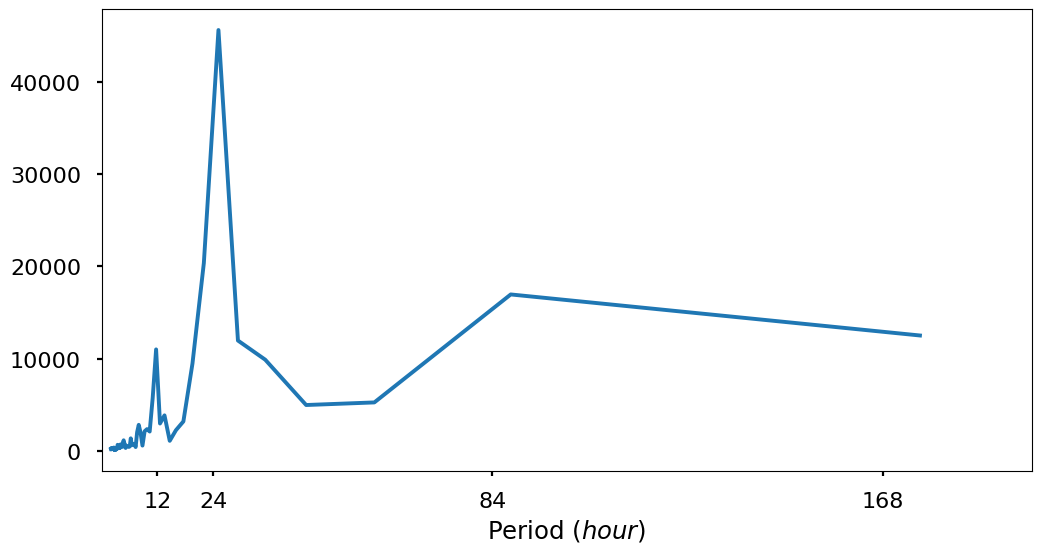

In [ ]:
# convert frequency to hour
t_h = 1/f_oneside / (60 * 60)

plt.figure(figsize=(12,6))
plt.plot(t_h, np.abs(X[:n_oneside])/n_oneside)
plt.xticks([12, 24, 84, 168])
plt.xlim(0, 200)
plt.xlabel('Period ($hour$)')
plt.show()

## Exercício 1
Obter a transformada rápida de Fourier com frequência de amostragem de 8000 Hz para uma função seno com amplitude 3 e frequência de 500 Hz e outra função seno com amplitude 1 e frequência de 1500 Hz. 

In [ ]:
## Resolução do Exercício

## Exercício 2

Determinar o espectro de frequência para o som de um toque de bell_celuar
. Usar o arquivo celular.wav


In [ ]:
## Resolução do Exercício